In [184]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from scipy import stats

# set seaborn settings
sns.set()
plt.rcParams["patch.force_edgecolor"] = True # set lines

In [185]:
# i'll just analyze one month first

directory = "data\\2016\\06"
filesList = [f for f in listdir(directory) if isfile(join(directory, f))]

In [186]:
filesList

['ChiTaxi_2016-06-01_2016-07-01_00000000000000000000.csv',
 'ChiTaxi_2016-06-01_2016-07-01_00000000000000200000.csv',
 'ChiTaxi_2016-06-01_2016-07-01_00000000000000400000.csv',
 'ChiTaxi_2016-06-01_2016-07-01_00000000000000600000.csv',
 'ChiTaxi_2016-06-01_2016-07-01_00000000000000800000.csv',
 'ChiTaxi_2016-06-01_2016-07-01_00000000000001000000.csv',
 'ChiTaxi_2016-06-01_2016-07-01_00000000000001200000.csv',
 'ChiTaxi_2016-06-01_2016-07-01_00000000000001400000.csv',
 'ChiTaxi_2016-06-01_2016-07-01_00000000000001600000.csv',
 'ChiTaxi_2016-06-01_2016-07-01_00000000000001800000.csv']

In [187]:
df = pd.DataFrame()

for file in filesList:
    filePath = os.path.join(directory, file)
    fileDf = pd.read_csv(filePath)
    df = pd.concat([df, fileDf])
    
len(df)

1935686

In [188]:
df.head(2).transpose()

0  \
company                                                                              NaN   
dropoff_census_tract                                                                 NaN   
dropoff_centroid_latitude                                                            NaN   
dropoff_centroid_location                                                            NaN   
dropoff_centroid_location.coordinates                                                NaN   
dropoff_centroid_location.type                                                       NaN   
dropoff_centroid_longitude                                                           NaN   
dropoff_community_area                                                               NaN   
extras                                                                                 1   
fare                                                                               10.75   
payment_type                                                                        Cash   
pickup_census_tract                                                                  NaN   
pickup_centroid_latitude                                                             NaN   
pickup_centroid_location                                                             NaN   
pickup_centroid_location.coordinates                                                 NaN   
pickup_centroid_location.type                                                        NaN   
pickup_centroid_longitude                                                            NaN   
pickup_community_area                                                                NaN   
taxi_id                                aa4c3beb61a579d4f214d3f92395a4f7bc7245a2cb21eb...   
tips                                                                                   0   
tolls                                                                                  0   
trip_end_timestamp                                               2016-06-01T00:15:00.000   
trip_id                                         06ba1ca4b0d9c69b8b87ea2595d020db914f3b3b   
trip_miles                                                                             3   
trip_seconds                                                                         660   
trip_start_timestamp                                             2016-06-01T00:00:00.000   
trip_total                                                                         11.75   

                                                                                       1  
company                                                                              NaN  
dropoff_census_tract                                                                 NaN  
dropoff_centroid_latitude                                                            NaN  
dropoff_centroid_location                                                            NaN  
dropoff_centroid_location.coordinates                                                NaN  
dropoff_centroid_location.type                                                       NaN  
dropoff_centroid_longitude                                                           NaN  
dropoff_community_area                                                               NaN  
extras                                                                                 4  
fare                                                                               43.75  
payment_type                                                                 Credit Card  
pickup_census_tract                                                                  NaN  
pickup_centroid_latitude                                                             NaN  
pickup_centroid_location                                                             NaN  
pickup_centroid_location.coordinates                                                 NaN  
pickup_centroid_location.type                         

In [189]:
# i'm interested in the following columns for now:

interestedCols = ["taxi_id", "tolls", "trip_start_timestamp", "trip_end_timestamp", "company", "dropoff_centroid_longitude", \
"dropoff_centroid_latitude", "fare", "payment_type", "pickup_centroid_latitude", "pickup_centroid_longitude", \
"dropoff_community_area", "pickup_community_area", "tips", "trip_miles", "trip_seconds", "trip_total"]

trips = df[interestedCols]

In [190]:
def removeOutliers(data):   
    data = data.astype(float).fillna(0.0)
    print("Started with ", len(data), "values")
    Q75, Q25 = np.percentile(data, [75, 25])
    IQR = Q75 - Q25
    min = Q25 - (IQR * 1.5)
    max = Q75 + (IQR * 1.5)
    data = np.array(data)
    result = data[np.where((data >= min) & (data <= max))]
    print("Ended with ", len(result), "values")
    print("==================")
    print(stats.describe(result))
    return(result)

In [191]:
tripMiles = removeOutliers(trips["trip_miles"])

Started with  1935686 values
Ended with  1690357 values
DescribeResult(nobs=1690357, minmax=(0.0, 6.9900000000000002), mean=1.2677650934092621, variance=2.1703477310650712, skewness=1.5368862883614511, kurtosis=2.1131472244087366)


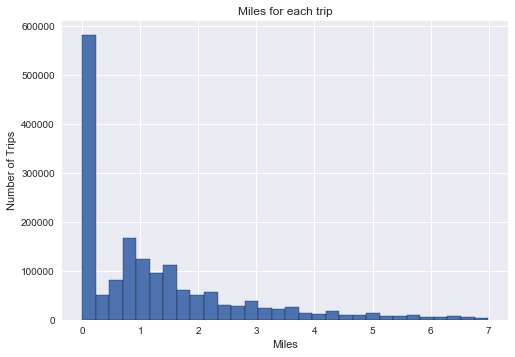

In [192]:
# trips_miles

_ = plt.hist(tripMiles, bins = 30)
_ = plt.xlabel("Miles")
_ = plt.ylabel("Number of Trips")
_ = plt.title("Miles for each trip")
plt.show()

In [193]:
tripTotal = removeOutliers(trips["trip_total"])

Started with  1935686 values
Ended with  1647879 values
DescribeResult(nobs=1647879, minmax=(0.0, 32.100000000000001), mean=11.01538356881786, variance=28.958896657841613, skewness=1.3129783734404175, kurtosis=1.8007932322567486)


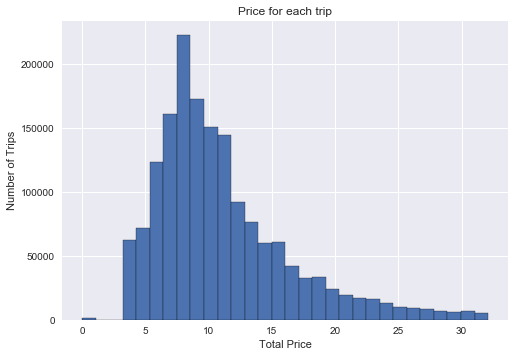

In [194]:
# trip total $
_ = plt.hist(tripTotal, bins = 30)
_ = plt.xlabel("Total Price")
_ = plt.ylabel("Number of Trips")
_ = plt.title("Price for each trip")
plt.show()

In [195]:
tripDuration = removeOutliers(trips["trip_seconds"])

Started with  1935686 values
Ended with  1769547 values
DescribeResult(nobs=1769547, minmax=(0.0, 1950.0), mean=599.28849530416539, variance=195660.8936933068, skewness=0.8111628988715021, kurtosis=0.2804914789280253)


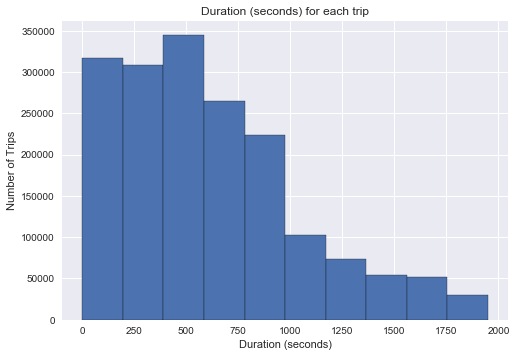

In [196]:
# trip duration (seconds)
_ = plt.hist(tripDuration)
_ = plt.xlabel("Duration (seconds)")
_ = plt.ylabel("Number of Trips")
_ = plt.title("Duration (seconds) for each trip")
plt.show()

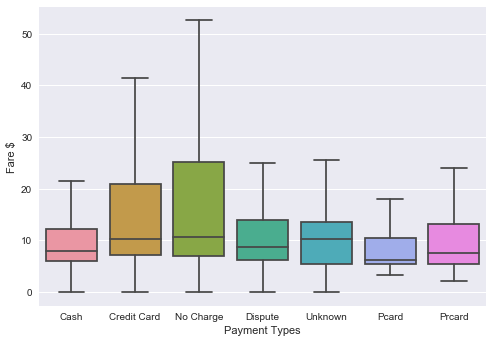

In [198]:
_ = sns.boxplot(x = "payment_type", y = "fare", data = trips, showfliers = False)
_ = plt.xlabel("Payment Types")
_ = plt.ylabel("Fare $")
plt.show()